# Deep Learning - Covid 19 classification

In [3]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import numpy as np
import os


### tensorflow - core library (also having Keras)
### tensorflow.keras.layers - For including different layers that can be included
### tensorflow.keras.models.Model - Creating complext models
### ImageDataGenerator - applying diversity in data, to reduce overfitting of data
### Adam - optimiser used to train deep learning models


In [6]:
from sklearn.model_selection import train_test_split
import numpy as np
import cv2

def load_data(data_directory, image_size=(224, 224)):
    
    categories = ['COVID19', 'NORMAL']  # Assuming two subdirectories for two classes
    labels = [0, 1]  # 0 for 'positive', 1 for 'negative'
    label_map = dict(zip(categories, labels))  # Mapping categories to labels
    
    images = []
    image_labels = []
    
    # Iterate through each category
    for category in categories:
        category_path = os.path.join(data_directory, category)
        
        # Iterate through each image in the category's directory
        for image_name in os.listdir(category_path):
            image_path = os.path.join(category_path, image_name)
            
            # Read the image and resize it
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            if image is not None:  
                image = cv2.resize(image, image_size)
                images.append(image)
                image_labels.append(label_map[category])
    
    # Convert lists to numpy arrays
    X = np.array(images, dtype='float32')
    X = np.expand_dims(X, axis=-1)  # Add an extra dimension for the channels
    y = np.array(image_labels, dtype='int')
    
    return X, y

data_directory = '/Users/sahilagrawal/Documents/Projects/DeepLearning-Covid19-classification/data/Data/train'
X, y = load_data(data_directory)

# Normalize pixel values to be between 0 and 1
X = X / 255.0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

# Apply data augmentation to the training data
train_generator = train_datagen.flow(X_train, y_train, batch_size=32)


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def build_model(input_shape):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')  # Binary output
    ])
    
    return model


Conv2D (Convolutional Layer): Primarily used for feature extraction in image data.

MaxPooling2D: Reduces spatial dimensions (downsampling).

Dense (Fully Connected Layer): Each neuron receives input from all neurons in the previous layer, used for classification or regression tasks.

Dropout: Randomly drops units from the neural network during training to prevent overfitting.

In [9]:
#Data Augmentation

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0,1]
    rotation_range=20,  # Randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2,  # Randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # Randomly shift images vertically (fraction of total height)
    shear_range=0.2,  # Apply shear transformations
    zoom_range=0.2,  # Randomly zoom image
    horizontal_flip=True,  # Randomly flip images horizontally
    fill_mode='nearest'  # Strategy used for filling in newly created pixels
)

# Note: Only apply data augmentation to the training data
test_datagen = ImageDataGenerator(rescale=1./255)  # For validation data, only rescaling is needed


In [14]:
from tensorflow.keras.optimizers import Adam

# Assuming input_shape is defined based on your preprocessed images, e.g., (224, 224, 1) for grayscale 224x224 images
input_shape = (224, 224, 1)  # Update this line according to your actual image size and channels

# Create the model instance with the defined architecture
model = build_model(input_shape)

# Now, compile the model with the desired optimizer, loss function, and metrics
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Model summary (optional, but helpful to verify the architecture)
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 32)      320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 26, 26, 128)      

In [15]:
# Train the model with the corrected 'model' variable
history = model.fit(
    train_generator,
    steps_per_epoch=len(X_train) // 32,  # Adjust based on your actual batch size and training set size
    epochs=25,  # You can adjust the number of epochs based on your observation of the training process
    validation_data=validation_generator,
    validation_steps=len(X_test) // 32  # Adjust based on your batch size and validation set size
)


Epoch 1/25
43/43 [==============================] - 18s 420ms/step - loss: 0.6124 - accuracy: 0.7389 - val_loss: 0.6043 - val_accuracy: 0.7094
Epoch 2/25
43/43 [==============================] - 18s 421ms/step - loss: 0.5846 - accuracy: 0.7381 - val_loss: 0.6079 - val_accuracy: 0.7094
Epoch 3/25
43/43 [==============================] - 19s 436ms/step - loss: 0.5796 - accuracy: 0.7374 - val_loss: 0.5987 - val_accuracy: 0.7094
Epoch 4/25
43/43 [==============================] - 19s 434ms/step - loss: 0.5694 - accuracy: 0.7396 - val_loss: 0.5986 - val_accuracy: 0.7063
Epoch 5/25
43/43 [==============================] - 19s 436ms/step - loss: 0.5519 - accuracy: 0.7381 - val_loss: 0.5335 - val_accuracy: 0.7188
Epoch 6/25
43/43 [==============================] - 19s 441ms/step - loss: 0.4708 - accuracy: 0.7352 - val_loss: 0.4114 - val_accuracy: 0.7188
Epoch 7/25
43/43 [==============================] - 19s 440ms/step - loss: 0.3659 - accuracy: 0.8064 - val_loss: 0.3423 - val_accuracy: 0.8906

In [16]:
# Assuming test_datagen is already defined and used for rescaling validation/test data
test_generator = test_datagen.flow(X_test, y_test, batch_size=32, shuffle=False)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator, steps=len(X_test) // 32)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


10/10 [==============================] - 1s 114ms/step - loss: 0.2999 - accuracy: 0.9250
Test Loss: 0.29985475540161133
Test Accuracy: 0.925000011920929


In [18]:
# Generate predictions for the test set
predictions = model.predict(validation_generator, steps=len(X_test) // 32)


10/10 [==============================] - 1s 111ms/step


In [19]:
# Convert probabilities to binary class labels
predicted_classes = (predictions > 0.5).astype(int)


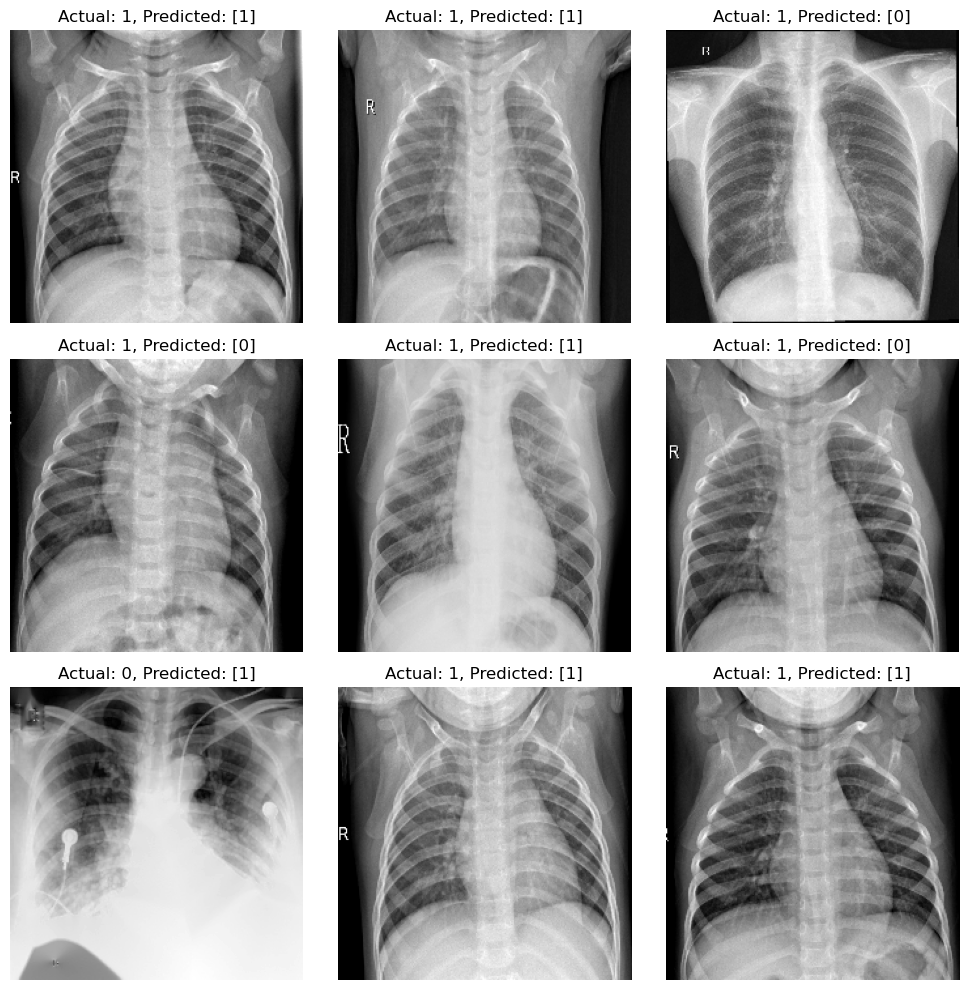

In [20]:
import matplotlib.pyplot as plt

def plot_predictions(images, actual_labels, predicted_labels):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f"Actual: {actual_labels[i]}, Predicted: {predicted_labels[i]}")
        plt.axis("off")
    plt.tight_layout()
    plt.show()

# Select a subset of images and their true labels for visualization
subset_images = X_test[:9]
subset_actual_labels = y_test[:9]

# Assuming predicted_classes are obtained as shown previously
plot_predictions(subset_images, subset_actual_labels, predicted_classes[:9])
